## 目录
* LSTM结构
* LSTM计算示例
* LSTM为什么可以避免梯度消失/爆炸
* LSTM tensorflow手写数字识别

**LSTM主要是为了解决RNN的梯度消失和梯度爆炸问题，LSTM网络结构和RNN完全一致，将RNN中的状态单元替换成lstm记忆单元就是LSTM网络**。

## LSTM结构
下图为单个lstm神经单元结构的**概貌**。

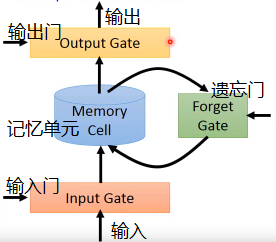

单个lstm神经单元包含以下4个输入和1个输出。   
**4个输入**
* 神经元输入信号：包含上一时刻网络的状态/输出和该时刻的自变量输入
* 输入门门控信号：控制是否让神经元输入信号通过
* 遗忘门门控信号：控制是否要遗忘或记住某信号
* 输出门门控信号：控制是否让神经元输出信号通过

**1个输出**
* 神经元输出信号：某时刻神经元的状态$s_t$

由于LSTM cell有4个输入，LSTM cell需要训练4倍于普通RNN cell的参数。

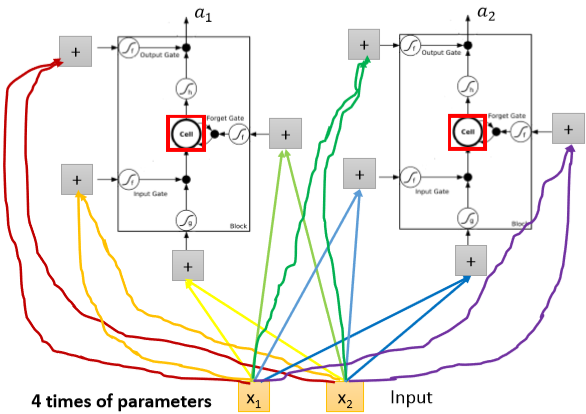

下图为**t时刻单个lstm神经单元结构的详细表示**。

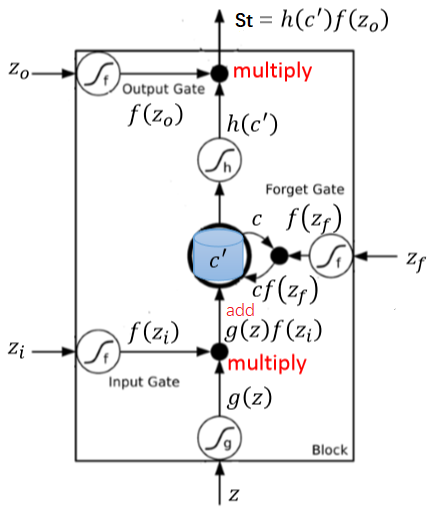

 **图中公式：**
* $Z= Ux_t+Ws_{t-1}$  
* $Z_i= U_ix_t+W_is_{t-1}$  
* $Z_f= U_fx_t+W_fs_{t-1}$  
* $Z_o= U_ox_t+W_os_{t-1}$  
* $c^{'} = 𝑔(𝑧)𝑓 (Z_i) +𝑐𝑓(Z_𝑓)$   
* $s_t= h(c^{'})𝑓(Z_o)$ 

**图注释：**
* h、g、f表示激活函数，f通常使用sigmoid来模拟门的开关
* Z、$Z_i、Z_f、Z_o$通过不同参数线性加权某时刻输入变量X得到，下标i、f、o分别表示input、forget、output
* $𝑓 (Z_i)=1$时，让神经元输入信号全部通过  
* $𝑓(Z𝑓)=1$时，保留之前所有记忆，并加入t时刻记忆   
* $f(Z_o) = 1$时，让神经元输出信号全部通过   
* c是上一时刻神经单元记忆值，$c^{'}$是该时刻记忆更新后的值  


下图为**t时刻和t+1时刻单个lstm神经单元结构表示。**

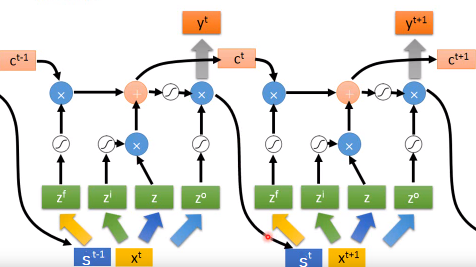

## LSTM计算示例

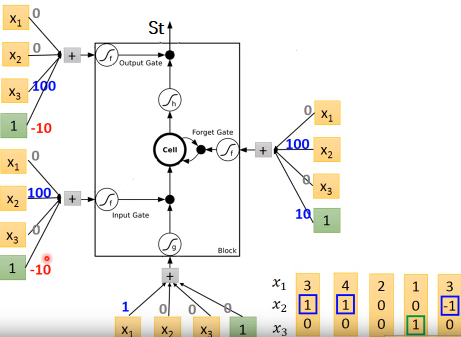

假设：  
* g(x)、h(x)均为线性激活函数且g(x)=x、h(x)=x
* W、W_i、W_f、W_o均为1  
* $s_0=0,c_0=0$
* 
计算：   

t1时刻的State  
* $Z= Ux_t+Ws_{0}=3*1=3$  
* $Z_i= U_ix_t+W_is_{0}=100-10=90$  
* $Z_f= U_fx_t+W_fs_{0}=100+10=110$  
* $Z_o= U_ox_t+W_os_{0}=-10$  
* $c^{'} = 𝑔(𝑧)𝑓 (Z𝑖) +𝑐𝑓(Z𝑓)=3*1+0*1=3$   
* $s_1= h(c^{'})f(Zo)=3*0=0$   

t2时刻的State
* $Z= Ux_t+Ws_{1}=4*1=4$  
* $Z_i= U_ix_t+W_is_{1}=100-10=90$  
* $Z_f= U_fx_t+W_fs_{1}=100+10=110$  
* $Z_o= U_ox_t+W_os_{1}=-10$  
* $c^{'} = 𝑔(𝑧)𝑓 (Z𝑖) +𝑐𝑓(Z𝑓)=4*1+3*1=7$   
* $s_2= h(c^{'})f(Zo)=7*0=0$ 

t3时刻的State
* $Z= Ux_t+Ws_{2}=2*1=2$  
* $Z_i= U_ix_t+W_is_{2}=-10$  
* $Z_f= U_fx_t+W_fs_{2}=10$  
* $Z_o= U_ox_t+W_os_{2}=-10$  
* $c^{'} = 𝑔(𝑧)𝑓 (Z𝑖) +𝑐𝑓(Z𝑓)=2*0+7*1=7$   
* $s_3= h(c^{'})f(Zo)=7*0=0$ 

t4时刻的State
* $Z= Ux_t+Ws_{3}=1$  
* $Z_i= U_ix_t+W_is_{3}=-10$  
* $Z_f= U_fx_t+W_fs_{3}=10$  
* $Z_o= U_ox_t+W_os_{3}=90$  
* $c^{'} = 𝑔(𝑧)𝑓 (Z𝑖) +𝑐𝑓(Z𝑓)=1*0+7*1=7$   
* $s_4= h(c^{'})f(Zo)=7*1=7$ 

t5时刻的State
* $Z= Ux_t+Ws_{4}=3+1*7=10$  
* $Z_i= U_ix_t+W_is_{4}=-100-10+1*7=-103$  
* $Z_f= U_fx_t+W_fs_{4}=-100+10+7=-83$  
* $Z_o= U_ox_t+W_os_{4}=90+7=97$  
* $c^{'} = 𝑔(𝑧)𝑓 (Z𝑖) +𝑐𝑓(Z𝑓)=7*0+7*0=0$   
* $s_5= h(c^{'})f(Zo)=0*1=0$ 

## LSTM为什么可以避免梯度消失/爆炸


* $c_t = 𝑔(𝑧)𝑓 (Z_i) +c_{t-1}𝑓(Z_𝑓)$

在反向传播过程中，$c_t$对$c_{t-1}$的偏导是遗忘门的输出值$𝑓(Z_𝑓)$，遗忘门的输出值通常接近1，所以只要gate是打开状态，$c_t$在反向传播过程中就不会发生梯度消失或梯度爆炸。

## LSTM tensorflow实现

tensorflow提供以下两种LSTM cell：
* cell = rnn_cell.BasicLSTMCell(num_units)  #最基础的，激活函数默认为tanh，不带peephole。
* cell = rnn_cell.LSTMCell(num_units, input_size)  #可以设置peephole等属性。
带有peephole的lstm cell会将上一时刻的$c_t$作为当前时刻训练所有参数的输入，见下图。
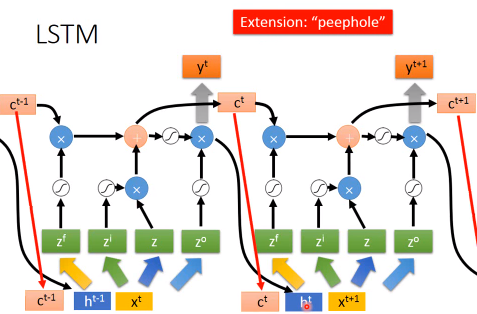

## LSTM tensorflow 示例：手写数字识别

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(35)
mnist = input_data.read_data_sets('/home/chineseNER/jupyter/Tensorflow入门/dataset/MNIST_data', one_hot=True)

# hyperparameters设置模型参数，该参数是确定模型训练方式的
lr = 0.001
training_iters = 100000
batch_size = 128

n_inputs = 28   # MNIST data input (img shape: 28*28)28维
n_steps = 28    # time steps28行，每次读一行数据训练
n_hidden_units = 128   # neurons in hidden layer
n_classes = 10      # MNIST classes (0-9 digits)

# tf Graph input，placehoder定义变量，hold住变量，在执行节点时传入数据给该变量
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #none表示输入图片张数不确定
y = tf.placeholder(tf.float32, [None, n_classes])
# 初始化参数，该参数在模型训练过程中会不断更新，最后达到最优
weights = {
    # 生成维度是(28, 128)的标准正太分布，mean=0，stddev=1
    'in': tf.Variable(tf.random_normal([n_inputs, n_hidden_units])),
    # (128, 10)
    'out': tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
}
biases = {
    # (128, )
    'in': tf.Variable(tf.constant(0.1, shape=[n_hidden_units, ])),
    # (10, )
    'out': tf.Variable(tf.constant(0.1, shape=[n_classes, ]))
}


def RNN(X, weights, biases):
    # 输入层
    ########################################

    # transpose the inputs shape from
    # (128 batch ,28 steps, 28 inputs) ==> (128 batch * 28 steps, 28 inputs)
    X = tf.reshape(X, [-1, n_inputs])

    # into hidden
    # X_in = (128 batch * 28 steps, 128 hidden)
    X_in = tf.matmul(X, weights['in']) + biases['in']
    # X_in ==> (128 batch, 28 steps, 128 hidden)
    X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])

    # 隐藏层
    ##########################################

    # BasicLSTMCell定义单个cell
    cell = tf.contrib.rnn.BasicLSTMCell(n_hidden_units)
    init_state = cell.zero_state(batch_size, dtype=tf.float32)
    #dynamic_rnn函数将cell连成RNN 网络
    outputs, final_state = tf.nn.dynamic_rnn(cell, X_in, initial_state=init_state)

    # 输出层：输出logits
    #############################################

    #results = tf.matmul(final_state[1], weights['out']) + biases['out']
    # unpack to list [(batch, outputs)..] * steps
    outputs = tf.unstack(tf.transpose(outputs, [1,0,2]))
    results = tf.matmul(outputs[-1], weights['out']) + biases['out']    # shape = (128, 10),每张图片10个logit值

    return results

#损失函数是整个minibatch的目标类别和预测类别之间的交叉熵,
pred = RNN(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
train_op = tf.train.AdamOptimizer(lr).minimize(cost)

correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
import time
start_time = time.time()
with tf.Session() as sess:
    # tf.initialize_all_variables() no long valid from
    # 2017-03-02 if using tensorflow >= 0.12
    if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
        init = tf.initialize_all_variables()
    else:
        init = tf.global_variables_initializer()
    sess.run(init)
    step = 0
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape([batch_size, n_steps, n_inputs])
        sess.run([train_op], feed_dict={
            x: batch_xs,
            y: batch_ys,
        })
        if step % 20 == 0:
            print('step:',step,'accuracy:',sess.run(accuracy, feed_dict={
            x: batch_xs,
            y: batch_ys,
            }))
        step += 1
print("--- %s seconds ---" % (time.time() - start_time))

Extracting /home/chineseNER/jupyter/Tensorflow入门/dataset/MNIST_data/train-images-idx3-ubyte.gz
Extracting /home/chineseNER/jupyter/Tensorflow入门/dataset/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /home/chineseNER/jupyter/Tensorflow入门/dataset/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /home/chineseNER/jupyter/Tensorflow入门/dataset/MNIST_data/t10k-labels-idx1-ubyte.gz
step: 0 accuracy: 0.140625
step: 20 accuracy: 0.601562
step: 40 accuracy: 0.796875
step: 60 accuracy: 0.859375
step: 80 accuracy: 0.828125
step: 100 accuracy: 0.890625
step: 120 accuracy: 0.921875
step: 140 accuracy: 0.851562
step: 160 accuracy: 0.890625
step: 180 accuracy: 0.890625
step: 200 accuracy: 0.898438
step: 220 accuracy: 0.9375
step: 240 accuracy: 0.945312
step: 260 accuracy: 0.953125
step: 280 accuracy: 0.953125
step: 300 accuracy: 0.945312
step: 320 accuracy: 0.945312
step: 340 accuracy: 0.914062
step: 360 accuracy: 0.976562
step: 380 accuracy: 0.953125
step: 400 accuracy: 0.953125
step: 420 accuracy: 0

## 参考文献
rnn梯度消失/爆炸问题：http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/  
lstm结构和示例：http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/RNN%20(v2).pdf  

lstm避免梯度消失/爆炸：  
http://www.cnblogs.com/rongyux/p/6729325.html  
https://zhuanlan.zhihu.com/p/27485750   
https://zhuanlan.zhihu.com/p/28749444   
